In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy.core.multiarray
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import sarimax


C:\Users\annguyen\AppData\Local\Temp\ipykernel_28028\2152748149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["datetime"].dt.month
C:\Users\annguyen\AppData\Local\Temp\ipykernel_28028\2152748149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mean"] = df["T_mu"].rolling(window=30).mean()


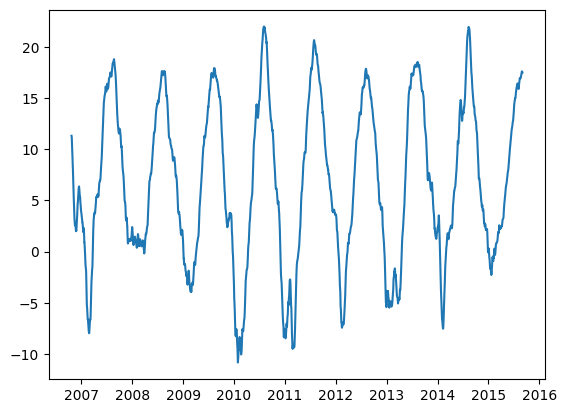

In [6]:
weather_data = pd.read_csv("weather_data_train.csv", parse_dates=["datetime"],sep=';', decimal=',')
df = weather_data[["datetime", "T_mu"]]
df["month"] = df["datetime"].dt.month
df["mean"] = df["T_mu"].rolling(window=30).mean()
#plot_acf(df["T_mu"])
plt.plot(df["datetime"], df["mean"])

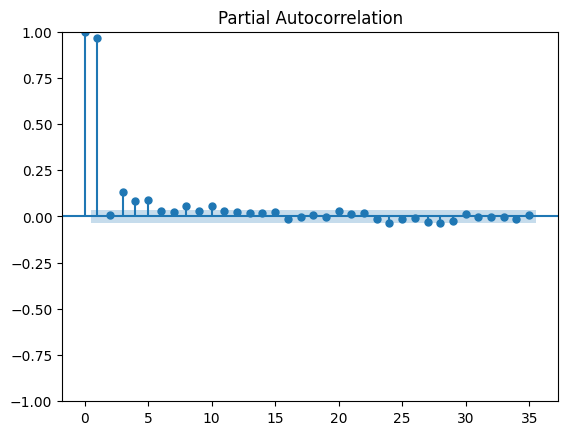

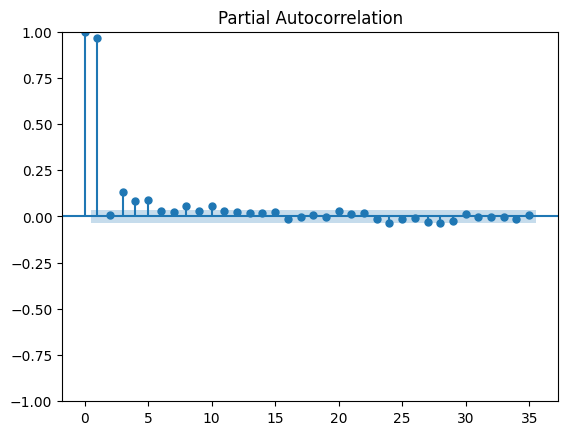

In [4]:
plot_pacf(df["T_mu"])

C:\Users\annguyen\AppData\Local\Temp\ipykernel_28028\2602740555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_1'] = df["T_mu"].diff(periods=12)
c:\Users\annguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


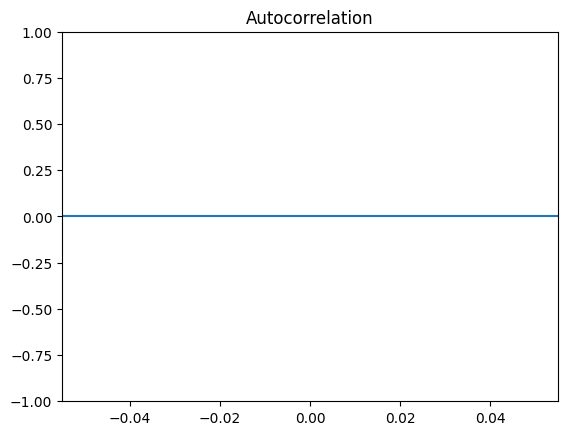

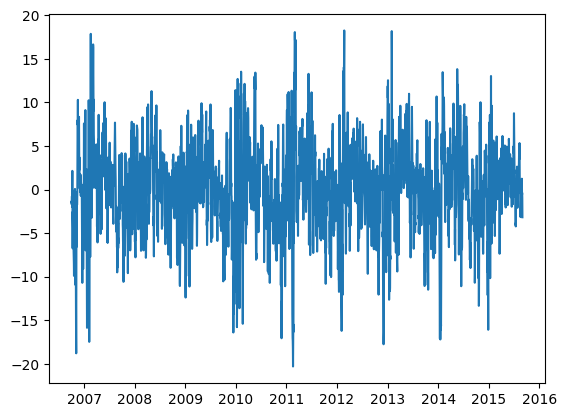

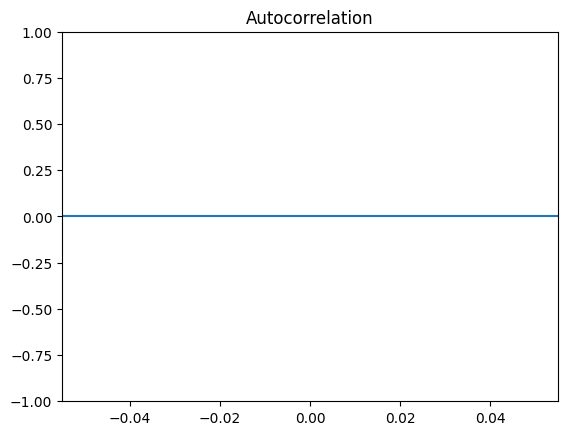

In [5]:


df['diff_1'] = df["T_mu"].diff(periods=12)

plt.plot(df["datetime"], df["diff_1"])
plot_acf(df["diff_1"])

In [8]:
arima_model = sarimax()
model = arima_model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [10]:
#y = mx + c
lagged = df["T_mu"].shift(1)
coef = random.uniform(0,1)
const = random.randint(1,100)
df["predicted"] = lagged * coef + const
error = df["predicted"] - df["T_mu"]